In [56]:
'''
＜変数の種類＞

量的変数
    間隔尺度
    比例尺度
質的変数
    名義尺度...区別のみ
    順序尺度...大小関係の意味あり

参考
https://qiita.com/sudominoru/items/840e87cc77de29f10ca2#pclass%E3%83%81%E3%82%B1%E3%83%83%E3%83%88%E3%82%AF%E3%83%A9%E3%82%B9
'''

'\n＜変数の種類＞\n\n量的変数\n    間隔尺度\n    比例尺度\n質的変数\n    名義尺度...区別のみ\n    順序尺度...大小関係の意味あり\n\n参考\nhttps://qiita.com/sudominoru/items/840e87cc77de29f10ca2#pclass%E3%83%81%E3%82%B1%E3%83%83%E3%83%88%E3%82%AF%E3%83%A9%E3%82%B9\n'

In [57]:
#データの確認
df = pd.read_csv("http://bit.ly/2MnDW3R")
print(df.shape)
df.head() 
#最後の5行 なら　df.tail()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#量的変数の統計情報
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
#質的変数の統計情報
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [60]:
# groopby
df_groop= df.groupby(['Pclass']).mean()
df_groop
 

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
#欠損値確認
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
#欠損値削除
df = df.dropna()
"""
# 欠損値を処理
df = df.fillna({'Age':-1})
df = df.fillna({'Embarked':'null'})
"""
# ラベル（名称）を数値化する
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'].values)
df['Embarked'] = LE.fit_transform(df['Embarked'].values)

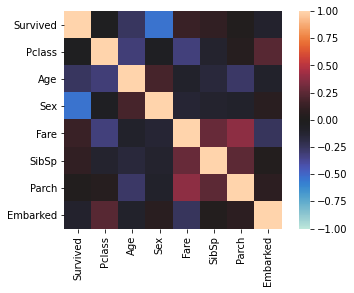

In [64]:
#ヒートマップ
df = df[["Survived","Pclass","Name","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]]

import seaborn as sns
sns.heatmap(df.corr(), square=True, vmax=1, vmin=-1, center=0)


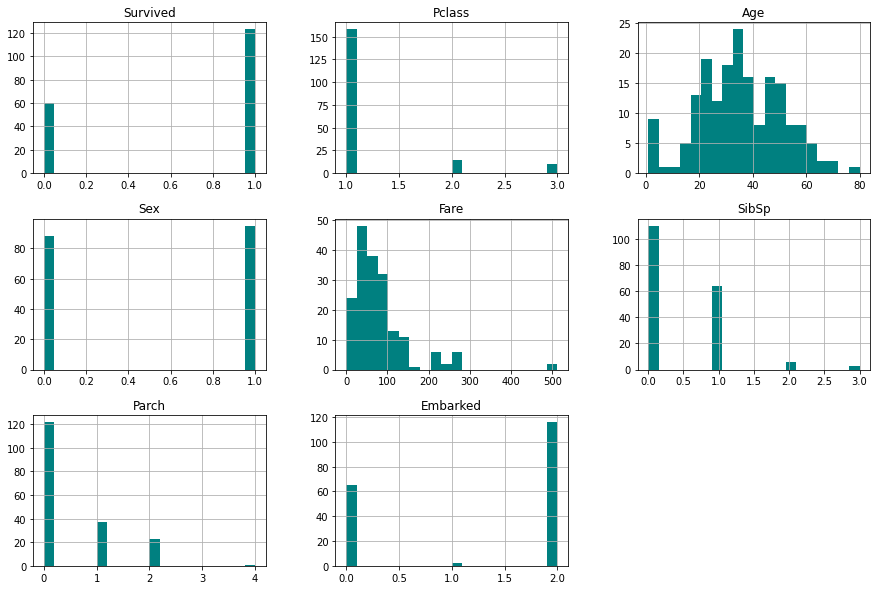

In [65]:
#ヒストグラム作成
df.hist(bins=20, figsize=(15,10), color = 'teal')
plt.show()

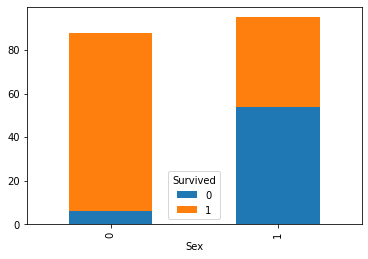

In [66]:
#クロス集計
cross_age = pd.crosstab(df['Survived'], df['Sex'])
cross_age.T.plot(kind='bar', stacked=True)
plt.show()

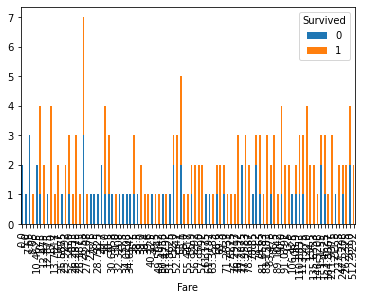

In [67]:
cross_age = pd.crosstab(df['Survived'], df['Fare'])
cross_age.T.plot(kind='bar', stacked=True)
plt.show()

In [68]:
#相関行列
df.corr()

,Survived,Pclass,Age,Sex,Fare,SibSp,Parch,Embarked
Survived,1.000000,-0.034542,-0.254085,-0.532418,0.134241,0.106346,0.023582,-0.100943
Pclass,-0.034542,1.000000,-0.306514,-0.046181,-0.315235,-0.103592,0.047496,0.236697
Age,-0.254085,-0.306514,1.000000,0.184969,-0.092424,-0.156162,-0.271271,-0.087312
Sex,-0.532418,-0.046181,0.184969,1.000000,-0.130433,-0.104291,-0.089581,0.063291
Fare,0.134241,-0.315235,-0.092424,-0.130433,1.000000,0.286433,0.389740,-0.242705
SibSp,0.106346,-0.103592,-0.156162,-0.104291,0.286433,1.000000,0.255346,0.038416
Parch,0.023582,0.047496,-0.271271,-0.089581,0.389740,0.255346,1.000000,0.081796
Embarked,-0.100943,0.236697,-0.087312,0.063291,-0.242705,0.038416,0.081796,1.000000
